# --> Importations

In [286]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --> Importation et normalisation des données en entrée

In [287]:
#Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist #Librairie dataset
(images, targets), (images_test, targets_test) = fashion_mnist.load_data() #On ignore les informations avec _
images = images[:10000] #On ne prend pas tout le dataset pour aller plus vite
targets = targets[:10000]

#Normalisation des valeurs de 0 a 255 => 0 a 1
from sklearn.preprocessing import StandardScaler
print("Avant normalisation")
print("Moyenne valeur pixel: ", images.mean())   #On voit que ces deux valeurs sont beaucoup
print("Ecart type valeur pixel: ", images.std()) #trop eleves, il faut donc normaliser
images = images.reshape(-1, 784)                 #On flatten les images en entree 2D => 1D
images = images.astype(float)                    #On definit les valeurs comme etant des float
scaler = StandardScaler()                        #StandardScaler est une fonction de normalisation qui diminue l'ecart type des valeurs
images = scaler.fit_transform(images)
print("Apres normalisation")
print("Moyenne valeur pixel: ", images.mean())   #On voit que ces deux valeurs ont bien
print("Ecart type valeur pixel: ", images.std()) #change et que la normalisation a eu lieu

#Normalisation des valeurs pour images_test
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)
images_test = scaler.fit_transform(images)

#Affichage de nos shape
print("\nShape des images : ", images.shape)
print("Shape de notre liste de classification : ", targets.shape)
#print(images[0]) #Tableau 2D de niveau de gris (0 a 255)
#print(targets[0]) #Numero de la classe

Avant normalisation
Moyenne valeur pixel:  73.00877385204082
Ecart type valeur pixel:  90.2745808471392
Apres normalisation
Moyenne valeur pixel:  -1.0476880134421886e-18
Ecart type valeur pixel:  1.0000000000000007

Shape des images :  (10000, 784)
Shape de notre liste de classification :  (10000,)


# --> Visualisation d'une des images du dataset

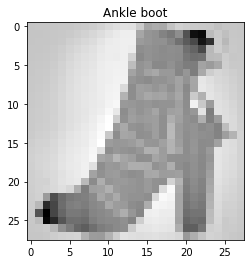

In [288]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bad", "Ankle boot"]
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary") #On precise avec "binary" que nous somme sur une image en noir et blanc
plt.title(targets_names[targets[11]])
plt.show()

In [289]:
#print(images[10][0]) #Affiche première ligne de l'image 10
#print(targets_names[targets[10]]) #Type de cette image

In [290]:
#On veut creer un reseau de neurone avec 784 input
print("Taille pixel image : ", images[0].size)
#On veut 2 layers dont la premiere a 256 neurones et la deuxieme 128
#Notre output layer aura 10 neurones car 10 types de classification
print("\nNombre de classificiation : ", len(targets_names))

Taille pixel image :  784

Nombre de classificiation :  10


In [291]:
#Comment formater les données en input
#model = tf.keras.models.Sequential() #On creer un model sequentiel
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28])) #On flatten notre image 28 par 28
#print("Shape avant flatten : ", images[0:1].shape) #On voit ici qu'elle est en 2D
#model_output = model.predict(images[0:1])
#print("Shape après flatten : ", model_output.shape) #On voit ici qu'elle a bien été flatten

# --> Ajout des layers

In [292]:
#Notre model sera de type sequentiel
model = tf.keras.models.Sequential() #Chaque neurones d'une couche C est connecte a chaque neurones de la couche C-1
#Ajout des layers
model.add(tf.keras.layers.Dense(256, activation="relu")) #256 neurones, fonction activation ReLU
model.add(tf.keras.layers.Dense(128, activation="relu")) #128 neurones, fonction activation ReLU
#10 neurones output car 10 types de classification, activation softmax pour distribution normal probabiliste
model.add(tf.keras.layers.Dense(10, activation="softmax")) 

In [293]:
#Tentative de prediction
model_output = model.predict(images[3:4])
print("Prediction du type de l'image :\n", model_output) 
print("\nType de l'image", targets[3:4])

Prediction du type de l'image :
 [[0.24238138 0.17393577 0.03112163 0.05494771 0.14094323 0.02295032
  0.11180449 0.07358    0.1182687  0.03006677]]

Type de l'image [3]


In [294]:
#On peut afficher un resume du model
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_56 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_57 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


# --> Qu'est ce que la categorical crossentropy ?

In [295]:
images_test = images[:5]                     #On ne prends que les 5 premieres images pour notre test
labels_test = targets[:5]
print("Images shape : ", images_test.shape)  #Affichage de la shape de nos images et targets
print("Targets shape : ", labels_test.shape)
outputs_test = model.predict(images_test)    #Tentative de prediction du model non entrainé pour les 5 premieres images
print("Output shape : ", outputs_test.shape) #Affichage de la shape de ce resultat
print("Output :\n", outputs_test)             #et du resultat

#Ici la shape de l'output est (5,10) donc nous avons pour chacune des 5 images
#10 valeurs qui sont les probabilites que l'image soit classifiee pour chacun des labels
#La categorical crossentropy filtre ces 10 valeurs pour ne garder que celle qui correspond
#a la "bonne reponse", celle qui devrait etre proche de 1 si le reseau est bien entraine
#Cette fonction de perte s'occupe donc seulement de cette valeur et cela ne pose pas de
#probleme car le softmax va creer une distribution de proportionalite sur la sortie.
#En effet, si on on modifie cette valeur en l'augmentant, cela faire diminuer les autres
#de par le softmax
filtered_outputs_test = outputs_test[np.arange(5), labels_test]
print("Output apres le filtre : ", filtered_outputs_test)

#Nous avons maintenant les probabilites qui devrait etre augmente pour chacune des images
#On applique alors np.log() 
#En effet des donnees mit au logarithme permet une meilleur convergence
#On sait qu'on utilise la descente de gradient pour pouvoir minimiser une erreur
#Quand on arrive a minimiser une erreur, on dit qu'on converge vers une solution
#Si on utilise le logarithme cela sera plus pratique pour effectuer la descente de gradient
#Le logarithme de change pas l'ordre croissant des valeurs car c'est une fonction
#qui est monotone croissante
log_filtered_outputs_test = np.log(filtered_outputs_test)
print("Output apres filtre et log : ", log_filtered_outputs_test)

#On veut minimiser une valeur qui est la moyenne de notre output
#On veut que cette valeur soit positive, on ajoute donc un "-" devant
print("Moyenne de cet output : ", - log_filtered_outputs_test.mean())

#Lors de la specification de la fonction de loss avec compile() on utilise "sparse_categorical_crossentropy"
#Le "sparse_" ici specifie que l'on peut utilise nos label comme etant [0, 1, 2, ..., 9]
#au lieu d'utiliser une representation "one hot encoding", qui pour nous donner la prediction "9"
#nous donnerait un vecteur one hot [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

#On choisit donc sparse_ si on a des labels specifique en entree
#on choisit categorical_crossentropy si nous avons un softmax sur l'output et plusieurs categories

Images shape :  (5, 784)
Targets shape :  (5,)
Output shape :  (5, 10)
Output :
 [[0.06401136 0.35327742 0.27995476 0.06256526 0.17488392 0.01122345
  0.02024394 0.0133011  0.01762618 0.00291271]
 [0.06381006 0.23002388 0.03228109 0.03446874 0.49424395 0.00129747
  0.0405521  0.03025181 0.06708867 0.00598227]
 [0.29319736 0.17091809 0.05220819 0.04830729 0.13348265 0.02922663
  0.09029993 0.06081352 0.09732257 0.02422382]
 [0.24238126 0.1739358  0.03112163 0.05494773 0.14094318 0.02295032
  0.11180451 0.07358002 0.11826872 0.03006676]
 [0.5744817  0.1996443  0.03729986 0.04388204 0.04035186 0.01018665
  0.04378411 0.01952748 0.02235324 0.00848865]]
Output apres le filtre :  [0.00291271 0.06381006 0.29319736 0.05494773 0.5744817 ]
Output apres filtre et log :  [-5.8386726 -2.7518444 -1.2269093 -2.901373  -0.554287 ]
Moyenne de cet output :  2.6546173


# --> Ajout de la fonction loss, optimizer, metrics

In [296]:
#Compilation du model
model.compile(
    loss="sparse_categorical_crossentropy",  #Fonction de perte
    optimizer="sgd",                         #Optimisation stochastic gradient descent
    metrics=["accuracy"]                     #Accuracy est la metrique que l'on veut utiliser
)

# --> Entrainement du model

In [297]:
#Entrainement du model
history = model.fit(images, targets, epochs=10) #On passe 10 fois sur l'entierete du datasat

Epoch 1/10
313/313 [==============================] - 0s 758us/step - loss: 1.2153 - accuracy: 0.6119
Epoch 2/10
313/313 [==============================] - 0s 873us/step - loss: 0.5185 - accuracy: 0.8158
Epoch 3/10
313/313 [==============================] - 0s 751us/step - loss: 0.4260 - accuracy: 0.8496
Epoch 4/10
313/313 [==============================] - 0s 790us/step - loss: 0.3844 - accuracy: 0.8662
Epoch 5/10
313/313 [==============================] - 0s 850us/step - loss: 0.3522 - accuracy: 0.8703
Epoch 6/10
313/313 [==============================] - 0s 886us/step - loss: 0.3206 - accuracy: 0.8849
Epoch 7/10
313/313 [==============================] - 0s 786us/step - loss: 0.2958 - accuracy: 0.8979
Epoch 8/10
313/313 [==============================] - 0s 802us/step - loss: 0.2830 - accuracy: 0.8979
Epoch 9/10
313/313 [==============================] - 0s 802us/step - loss: 0.2669 - accuracy: 0.9113
Epoch 10/10
313/313 [==============================] - 0s 833us/step - loss: 0.263

# --> Affichage des courbes après entrainement

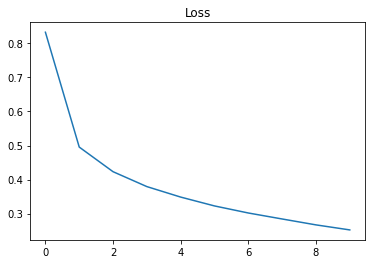

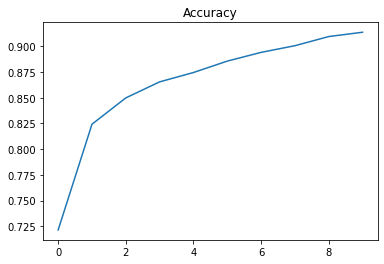

In [298]:
#Affichage des resultats finaux
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]
plt.plot(loss_curve)
plt.title("Loss")
plt.show()
plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()